In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *
from pathlib import Path

In [3]:
data_path = Path('/home/jupyter/tutorials/data/Competitions/CarClassification/')

In [4]:
data_path.ls()

[PosixPath('/home/jupyter/tutorials/data/Competitions/CarClassification/car_data.zip'),
 PosixPath('/home/jupyter/tutorials/data/Competitions/CarClassification/anno_train.csv'),
 PosixPath('/home/jupyter/tutorials/data/Competitions/CarClassification/anno_test.csv'),
 PosixPath('/home/jupyter/tutorials/data/Competitions/CarClassification/car_data'),
 PosixPath('/home/jupyter/tutorials/data/Competitions/CarClassification/names.csv'),
 PosixPath('/home/jupyter/tutorials/data/Competitions/CarClassification/stanford-car-dataset-by-classes-folder.zip')]

In [5]:
cars = data_path/'car_data'
names = data_path/'names.csv'

In [6]:
cars.ls()

[PosixPath('/home/jupyter/tutorials/data/Competitions/CarClassification/car_data/test'),
 PosixPath('/home/jupyter/tutorials/data/Competitions/CarClassification/car_data/train'),
 PosixPath('/home/jupyter/tutorials/data/Competitions/CarClassification/car_data/models')]

In [7]:
train = cars/'train'
test = cars/'test'
np.random.seed(50)

In [64]:
help(ImageDataBunch.from_folder)

Help on method from_folder in module fastai.vision.data:

from_folder(path:Union[pathlib.Path, str], train:Union[pathlib.Path, str]='train', valid:Union[pathlib.Path, str]='valid', test:Union[pathlib.Path, str, NoneType]=None, valid_pct=None, **kwargs:Any) -> 'ImageDataBunch' method of builtins.type instance
    Create from imagenet style dataset in `path` with `train`,`valid`,`test` subfolders (or provide `valid_pct`).



In [65]:

data = ImageDataBunch.from_folder(cars, train = 'train', valid='test', ds_tfms=get_transforms(), size=224, bs=64).normalize(imagenet_stats)

In [66]:
len(data.train_ds)

8144

In [67]:
len(data.valid_ds)

8041

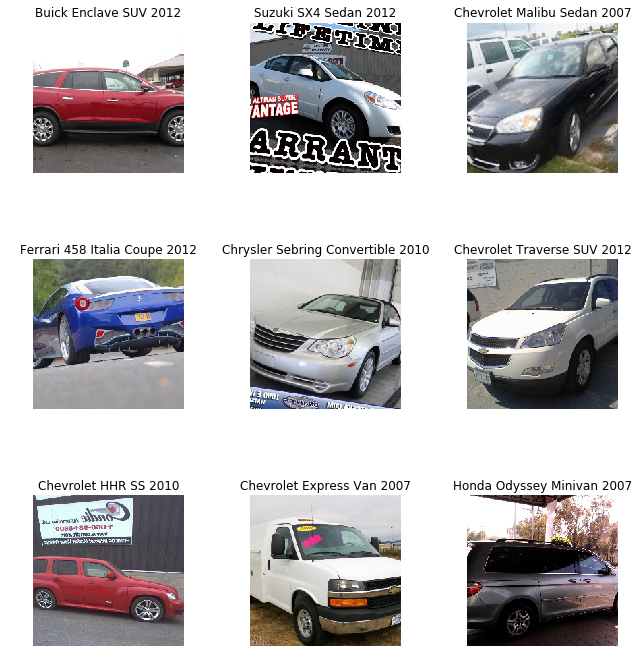

In [68]:
data.show_batch(rows=3)

In [69]:
learn_res34 = create_cnn(data, models.resnet34, metrics=error_rate)

In [70]:
learn_res34_2 = create_cnn(data, models.resnet34, metrics=error_rate, pretrained=False)

In [71]:
learn_res34.fit_one_cycle(4)

Total time: 05:33
epoch  train_loss  valid_loss  error_rate
1      4.828606    3.802822    0.814202    (01:23)
2      3.319351    2.480825    0.601791    (01:24)
3      2.368031    1.970631    0.497575    (01:22)
4      1.945475    1.879087    0.471334    (01:23)



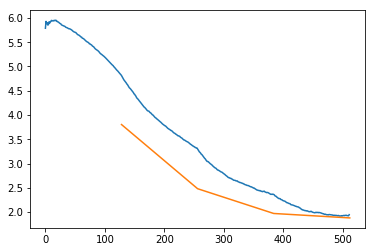

In [72]:
learn_res34.recorder.plot_losses()

In [73]:
learn_res34.save('learn_res34_4')

In [74]:
learn_res34.unfreeze()

In [75]:
learn_res34.fit_one_cycle(1)

Total time: 01:29
epoch  train_loss  valid_loss  error_rate
1      2.623806    1.810271    0.469593    (01:29)



In [76]:
learn_res34.load('learn_res34_4')

In [77]:
learn_res34.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


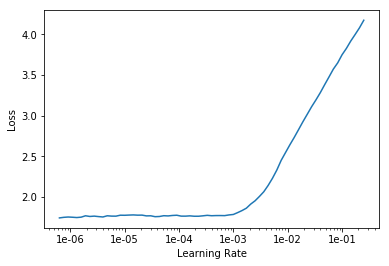

In [78]:
learn_res34.recorder.plot()

In [79]:
learn_res34.unfreeze()

In [80]:
learn_res34.fit_one_cycle(10, max_lr=slice(1e-5,1e-4))

Total time: 14:33
epoch  train_loss  valid_loss  error_rate
1      1.769887    1.789906    0.449944    (01:26)
2      1.621843    1.648060    0.409402    (01:27)
3      1.494843    1.495813    0.374083    (01:27)
4      1.282275    1.348205    0.336028    (01:28)
5      1.100709    1.254673    0.309539    (01:26)
6      0.981779    1.175384    0.290387    (01:26)
7      0.891356    1.134235    0.280313    (01:28)
8      0.810306    1.096467    0.272852    (01:26)
9      0.770097    1.087768    0.270364    (01:27)
10     0.743979    1.078284    0.269991    (01:27)



In [81]:
learn_res34.save('cars-uf-34')

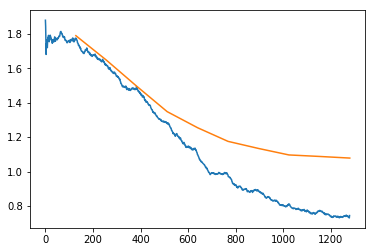

In [82]:
learn_res34.recorder.plot_losses()

In [ ]:
eval_res34 = ClassificationInterpretation.from_learner(learn_res34)

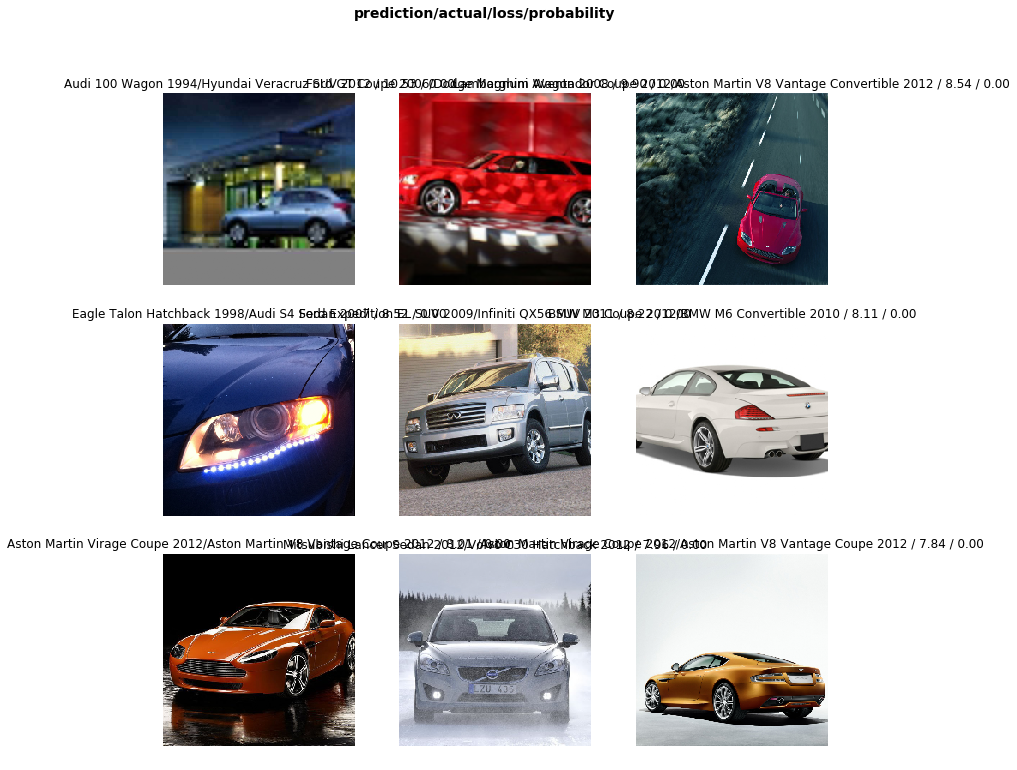

In [ ]:
eval_res34.plot_top_losses(9)

In [ ]:
eval_res34.most_confused()

[('Audi S5 Coupe 2012', 'Audi A5 Coupe 2012', 19),
 ('Audi 100 Sedan 1994', 'Audi V8 Sedan 1994', 14),
 ('Dodge Sprinter Cargo Van 2009', 'Mercedes-Benz Sprinter Van 2012', 14),
 ('Audi TTS Coupe 2012', 'Audi TT Hatchback 2011', 13),
 ('Chevrolet Express Van 2007', 'GMC Savana Van 2012', 12),
 ('Bentley Continental GT Coupe 2012',
  'Bentley Continental GT Coupe 2007',
  11),
 ('Audi TT RS Coupe 2012', 'Audi TT Hatchback 2011', 10),
 ('BMW 6 Series Convertible 2007', 'BMW M6 Convertible 2010', 10),
 ('Bentley Continental Flying Spur Sedan 2007',
  'Bentley Continental GT Coupe 2007',
  10),
 ('Chevrolet Express Cargo Van 2007', 'GMC Savana Van 2012', 10),
 ('Chevrolet Express Van 2007', 'Chevrolet Express Cargo Van 2007', 10),
 ('Chevrolet Silverado 1500 Hybrid Crew Cab 2012',
  'Chevrolet Silverado 1500 Extended Cab 2012',
  10),
 ('Dodge Caliber Wagon 2012', 'Dodge Caliber Wagon 2007', 10),
 ('Dodge Ram Pickup 3500 Crew Cab 2010',
  'Dodge Ram Pickup 3500 Quad Cab 2009',
  10),
 ('Be

In [ ]:
eval_res34.plot_confusion_matrix(dpi=80, figsize=(25,25))

In [8]:
data50 = ImageDataBunch.from_folder(cars, train = 'train', valid='test', ds_tfms=get_transforms(), size=299, bs=32).normalize(imagenet_stats)

In [9]:
learn50 = create_cnn(data50, models.resnet50, metrics = error_rate)

In [10]:
learn50.fit_one_cycle(2)

Total time: 06:44
epoch  train_loss  valid_loss  error_rate
1      3.564612    2.488237    0.597936    (03:28)
2      2.019858    1.693283    0.404427    (03:15)



In [11]:
learn50.save('learn50-ep2')

In [12]:
learn50.unfreeze()

In [13]:
learn50.fit_one_cycle(1)

Total time: 04:06
epoch  train_loss  valid_loss  error_rate
1      2.591825    1.767892    0.426937    (04:06)



In [14]:
learn50.load('learn50-ep2')

In [15]:
learn50.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


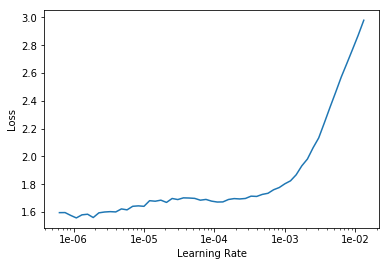

In [16]:
learn50.recorder.plot(skip_end=20)

In [17]:
learn50.unfreeze()

In [18]:
learn50.fit_one_cycle(10, max_lr=slice(5e-04, 9e-03))

Total time: 40:37
epoch  train_loss  valid_loss  error_rate
1      2.617674    2.876002    0.701281    (04:02)
2      2.860018    3.099245    0.729511    (04:03)
3      2.586211    2.538885    0.632135    (04:03)
4      2.084904    1.979895    0.507773    (04:03)
5      1.625290    1.414295    0.379555    (04:04)
6      1.213940    1.115229    0.300958    (04:03)
7      0.877762    0.727373    0.203333    (04:04)
8      0.570507    0.559090    0.162293    (04:03)
9      0.337826    0.478476    0.138291    (04:03)
10     0.299588    0.464956    0.132819    (04:03)



In [19]:
learn50.save('learn50-uf-10e')

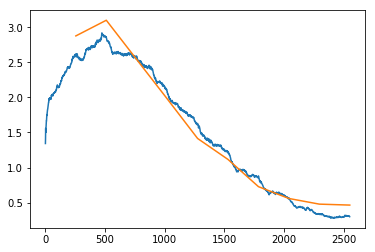

In [20]:
learn50.recorder.plot_losses()

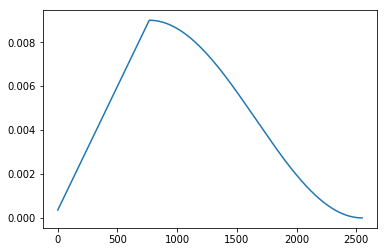

In [21]:
learn50.recorder.plot_lr()

In [22]:
eval_learn50 = ClassificationInterpretation.from_learner(learn50)

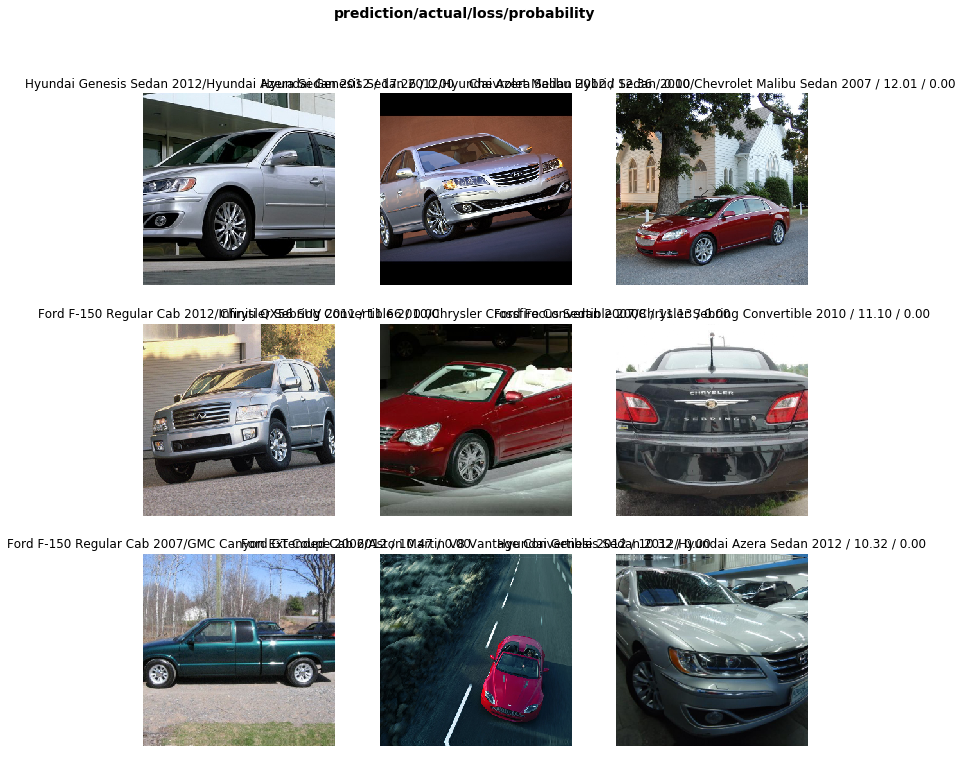

In [23]:
eval_learn50.plot_top_losses(9)

In [24]:
eval_learn50.most_confused()

[('Audi S5 Coupe 2012', 'Audi A5 Coupe 2012', 16),
 ('Dodge Caliber Wagon 2012', 'Dodge Caliber Wagon 2007', 15),
 ('Audi TTS Coupe 2012', 'Audi TT Hatchback 2011', 11),
 ('Chevrolet Express Cargo Van 2007', 'Chevrolet Express Van 2007', 10),
 ('Chevrolet Express Van 2007', 'Chevrolet Express Cargo Van 2007', 9),
 ('Dodge Sprinter Cargo Van 2009', 'Mercedes-Benz Sprinter Van 2012', 9),
 ('Audi 100 Sedan 1994', 'Audi 100 Wagon 1994', 8),
 ('Audi TT Hatchback 2011', 'Audi TTS Coupe 2012', 8),
 ('Audi V8 Sedan 1994', 'Audi 100 Sedan 1994', 8),
 ('BMW 6 Series Convertible 2007', 'BMW M6 Convertible 2010', 8),
 ('Bentley Continental GT Coupe 2007',
  'Bentley Continental Flying Spur Sedan 2007',
  8),
 ('Bugatti Veyron 16.4 Convertible 2009', 'Bugatti Veyron 16.4 Coupe 2009', 8),
 ('Chevrolet Silverado 1500 Hybrid Crew Cab 2012',
  'Chevrolet Silverado 1500 Extended Cab 2012',
  8),
 ('Chevrolet Silverado 2500HD Regular Cab 2012',
  'Chevrolet Silverado 1500 Regular Cab 2012',
  8),
 ('Chev

In [ ]:
data50.classes